In [28]:
from google.colab import files
uploaded = files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv to API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv


In [29]:
uploaded = files.upload()

Saving Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv to Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv


In [30]:

uploaded = files.upload()

Saving Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv to Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv


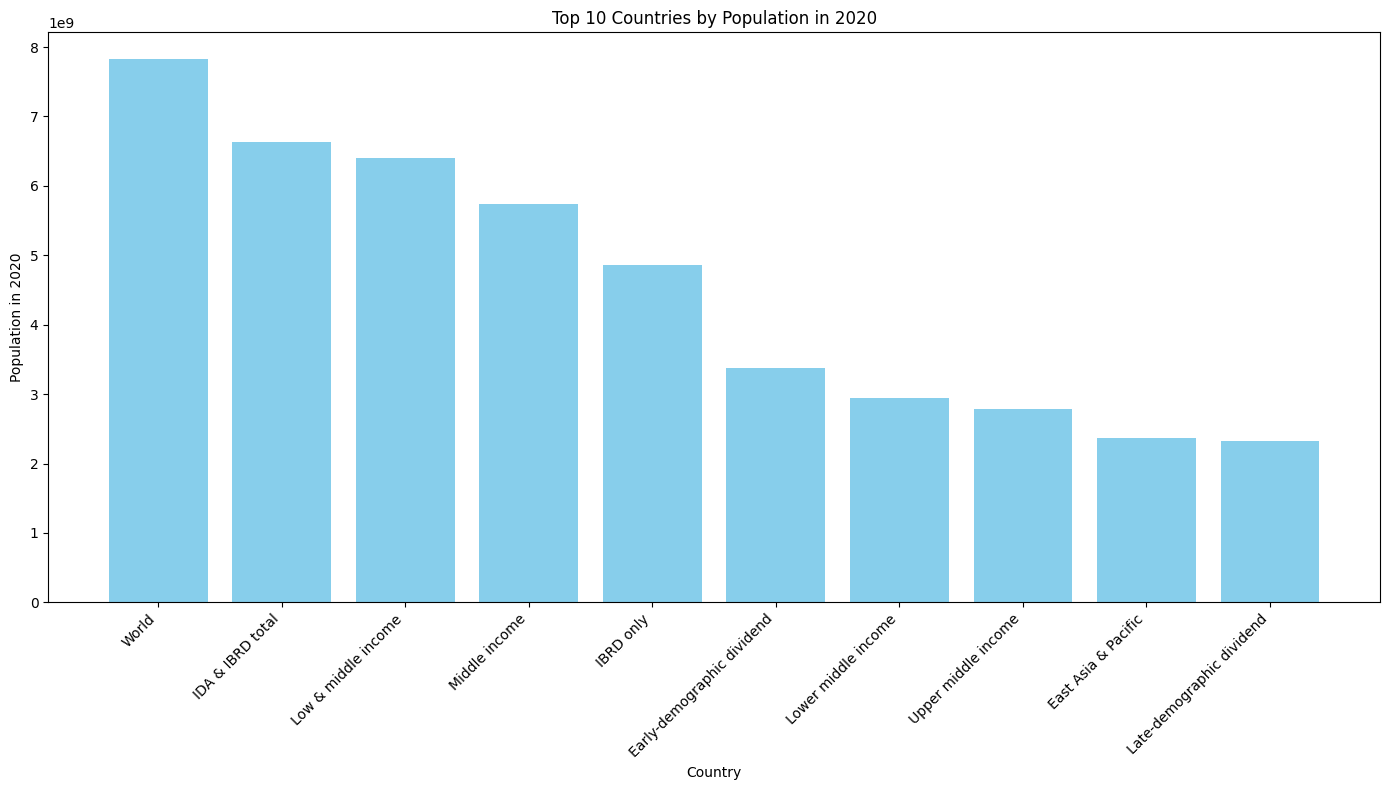

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data1 = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv', skiprows=4)
data2 = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv')
data3 = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv')

# Extract population data for 2020
population_2020 = data1[['Country Name', 'Country Code', '2020']]

# Merge with country metadata to get region and income group
population_2020_merged = population_2020.merge(data2[['Country Code', 'Region', 'IncomeGroup']], on='Country Code', how='left')

# Drop rows with missing population data
population_2020_merged = population_2020_merged.dropna(subset=['2020'])

# Sort by population to get a better visualization
population_2020_merged = population_2020_merged.sort_values(by='2020', ascending=False)

# Create a bar chart
plt.figure(figsize=(14, 8))
plt.bar(population_2020_merged['Country Name'][:10], population_2020_merged['2020'][:10], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population in 2020')
plt.title('Top 10 Countries by Population in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


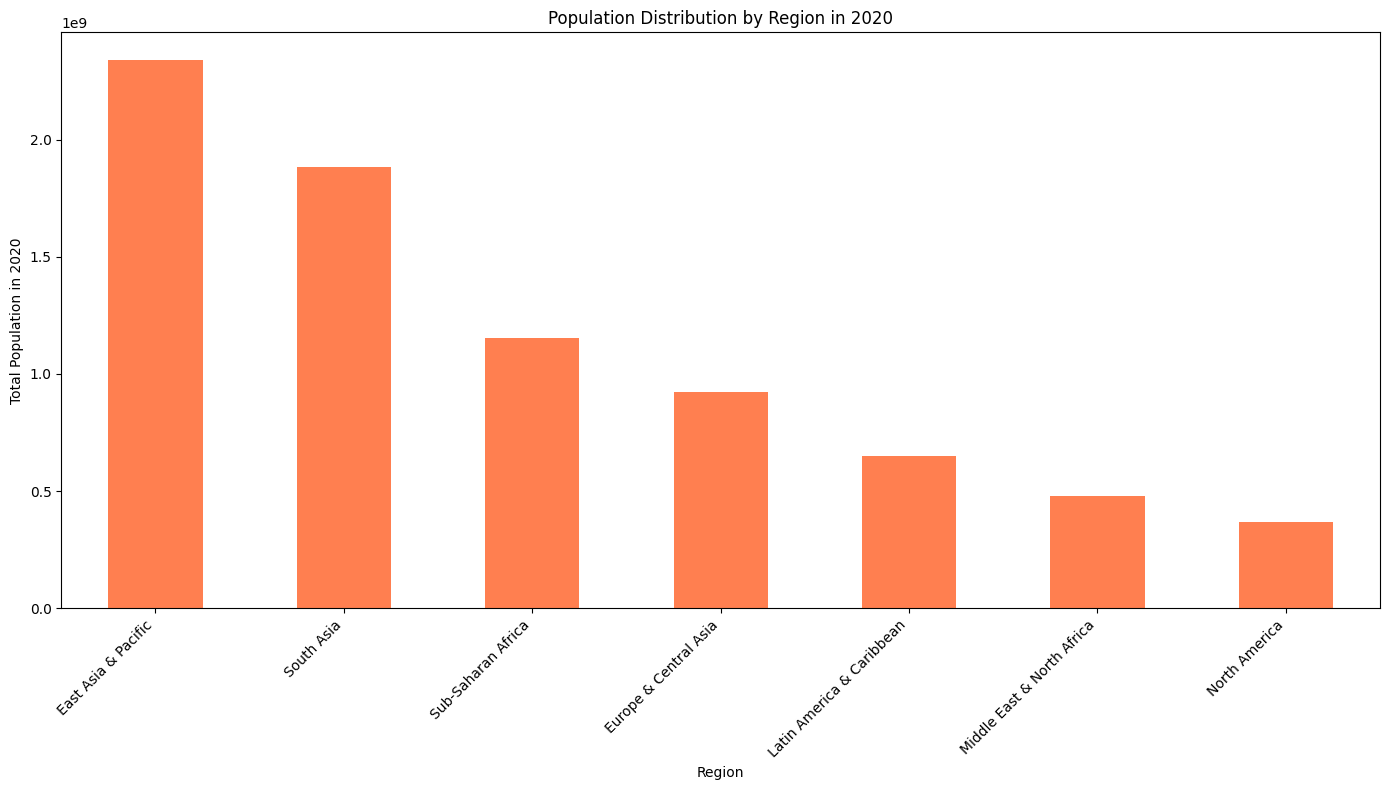

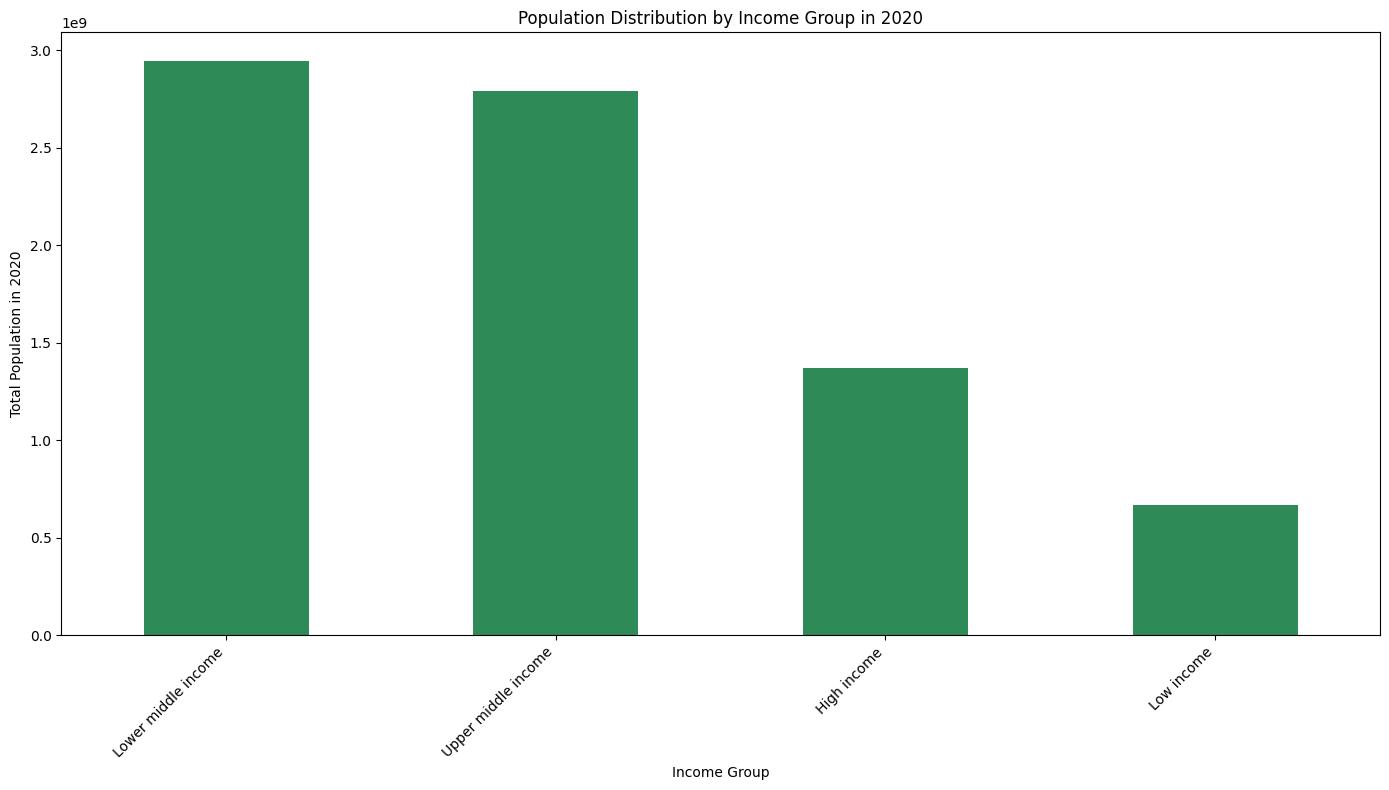

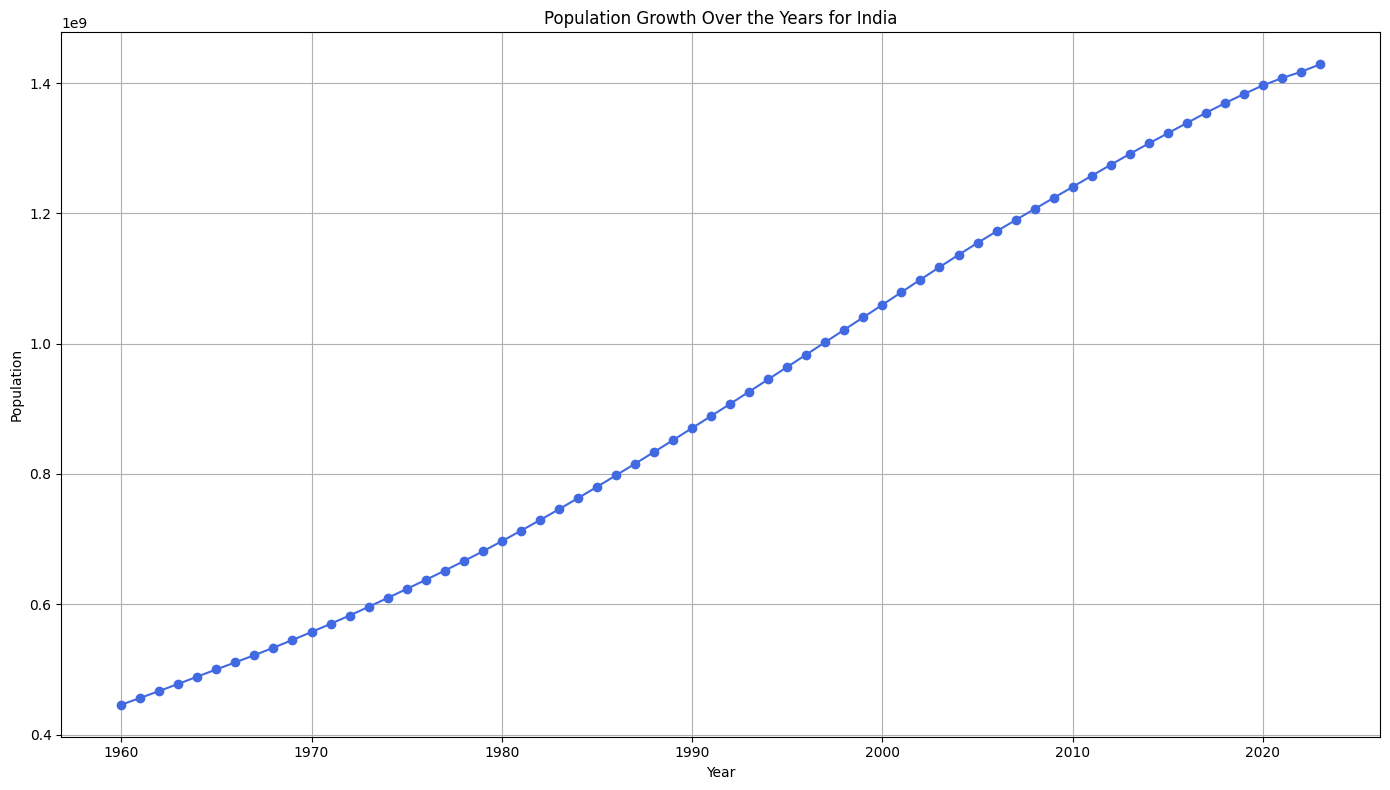

In [32]:
# Group by region and sum the population for 2020
region_population = population_2020_merged.groupby('Region')['2020'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(14, 8))
region_population.plot(kind='bar', color='coral')
plt.xlabel('Region')
plt.ylabel('Total Population in 2020')
plt.title('Population Distribution by Region in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
# Group by income group and sum the population for 2020
income_population = population_2020_merged.groupby('IncomeGroup')['2020'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(14, 8))
income_population.plot(kind='bar', color='seagreen')
plt.xlabel('Income Group')
plt.ylabel('Total Population in 2020')
plt.title('Population Distribution by Income Group in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
# Select a specific country (e.g., India)
country_name = 'India'
country_data = data1[data1['Country Name'] == country_name].iloc[0, 4:-1].dropna()

# Convert the index to a datetime format for plotting
years = country_data.index.astype(int)
population_values = country_data.values.astype(float)

# Create a line plot
plt.figure(figsize=(14, 8))
plt.plot(years, population_values, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population Growth Over the Years for {country_name}')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
